In [1]:
import sqlite3
import pandas as pd
conn = sqlite3.connect("factbook.db")
cursor = conn.cursor()

In [2]:
q = "SELECT * FROM sqlite_master WHERE type='table';"
cursor.execute(q).fetchall()


[('table',
  'sqlite_sequence',
  'sqlite_sequence',
  3,
  'CREATE TABLE sqlite_sequence(name,seq)'),
 ('table',
  'facts',
  'facts',
  47,
  'CREATE TABLE "facts" ("id" INTEGER PRIMARY KEY AUTOINCREMENT NOT NULL, "code" varchar(255) NOT NULL, "name" varchar(255) NOT NULL, "area" integer, "area_land" integer, "area_water" integer, "population" integer, "population_growth" float, "birth_rate" float, "death_rate" float, "migration_rate" float)')]

In [3]:
pd.read_sql_query(q, conn)


,type,name,tbl_name,rootpage,sql
0,table,sqlite_sequence,sqlite_sequence,3,"CREATE TABLE sqlite_sequence(name,seq)"
1,table,facts,facts,47,"CREATE TABLE ""facts"" (""id"" INTEGER PRIMARY KEY..."


In [4]:
query = "SELECT * FROM facts limit 5;"
pd.read_sql_query(query, conn)

,id,code,name,area,area_land,area_water,population,population_growth,birth_rate,death_rate,migration_rate
0,1,af,Afghanistan,652230,652230,0,32564342,2.32,38.57,13.89,1.51
1,2,al,Albania,28748,27398,1350,3029278,0.30,12.92,6.58,3.30
2,3,ag,Algeria,2381741,2381741,0,39542166,1.84,23.67,4.31,0.92
3,4,an,Andorra,468,468,0,85580,0.12,8.13,6.96,0.00
4,5,ao,Angola,1246700,1246700,0,19625353,2.78,38.78,11.49,0.46


In [5]:
q2 = '''select min(population) min_pop, max(population) max_pop,
min(population_growth) min_pop_growth, max(population_growth) max_pop_growth
from facts;
'''
pd.read_sql_query(q2, conn)


,min_pop,max_pop,min_pop_growth,max_pop_growth
0,0,7256490011,0.0,4.02


In [6]:
q3 = ''' select * from facts where population = (select min(population)
from facts);
'''
pd.read_sql_query(q3, conn)


,id,code,name,area,area_land,area_water,population,population_growth,birth_rate,death_rate,migration_rate
0,250,ay,Antarctica,None,280000,None,0,None,None,None,None


In [7]:
q4 = ''' select * from facts where population =
(select max(population) from facts);
'''
pd.read_sql_query(q4, conn)

,id,code,name,area,area_land,area_water,population,population_growth,birth_rate,death_rate,migration_rate
0,261,xx,World,None,None,None,7256490011,1.08,18.6,7.8,None


** Antarctica has lowest population in the world while the world has a  population of more than 7.2 billion people. These two happens to be the outliers in the dataset.

NameError: name 'pd' is not defined

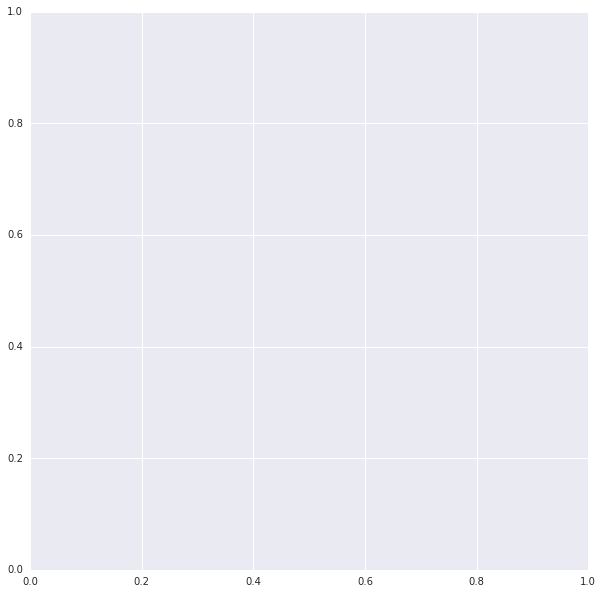

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)

q5 = '''
select population, population_growth, birth_rate, death_rate
from facts
where population != (select max(population) from facts)
and population != (select min(population) from facts);
'''
pd.read_sql_query(q5, conn).hist(ax=ax)


** This was a Using just the non-outlier rows, generate a 2 by 2 grid of histograms for the following columns: